Este conjunto de datos contiene información sobre propiedades en venta en los principales departamentos de Colombia: Cundinamarca, Bogotá, Antioquia, Valle del Cauca, Atlántico, Bolívar, Santander, Risaralda, Caldas, Quindío, Magdalena, Meta, Norte de Santander, Córdoba y Tolima.
Los datos se obtuvieron el 14 de enero de 2025 a las 19:00 (GMT-5) mediante web scraping.
Algunas columnas tienen datos en blanco para que pueda practicar técnicas como la limpieza de datos, la predicción de precios, el análisis descriptivo o estadístico y el análisis de datos de origen (EDA), entre otras.

In [1]:
#Importar librerias
import pandas as pd

#Ruta del archivo
path = '../Datasets/FincaRaiz_2025_01_14.csv'

#Cargar el archivo
df = pd.read_csv(path)

pd.set_option('display.max_columns', None)

#Mostrar las primeras filas del DataFrame
df

,Titulo,Fecha Actualizacion,ID Propiedad,Link Propiedad,Tipo Propiedad,Tipo Operacion,Link Google Maps,Direccion,Ubicacion Principal,Estado,Ciudad,Localidad,Comuna,Zona,Region,Barrios,Piso N,Banos,Habitaciones,Garages,Area Construida,Antiguedad,Estrato,Precio,Estado Construccion,Antiguedad_Categoria,Localidad_Defi,Fecha_Captura
0,Casa en venta,2024-11-08,10846760,https://www.fincaraiz.com.co/casa-en-venta/108...,Casa,Venta,"https://maps.google.com/?q=4.5866754,-74.1386996","Calle 52 Sur #36-42, Bogotá, Colombia",Fatima,Bogotá,Bogotá,Tunjuelito,NaN,Zona sur,NaN,Fatima,-,4,9,1,250.00,16 a 30 años,3,390000000,NaN,4.0,Bogotá,2025-01-14
1,Casa en venta,2024-12-09,10377449,https://www.fincaraiz.com.co/casa-en-venta/103...,Casa,Venta,"https://maps.google.com/?q=4.730176,-74.0253187","Cra. 7b #155-14, Bogotá, Colombia",Barrancas Norte,Bogotá,Bogotá,Usaquen,NaN,Zona norte,NaN,Barrancas Norte - Rincon de calamar,-,4,8,1,243.00,más de 30 años,3,688000000,NaN,5.0,Bogotá,2025-01-14
2,Casa en venta,2024-12-09,10179783,https://www.fincaraiz.com.co/casa-en-venta/101...,Casa,Venta,"https://maps.google.com/?q=4.6672435,-74.0825084","Carrera 57c #66b-29, Bogotá, Colombia",Popular modelo,Bogotá,Bogotá,Barrios unidos,NaN,Zona occidental,NaN,Barrios Unidos - Popular modelo,-,3,5,1,218.50,más de 30 años,4,599000000,NaN,5.0,Bogotá,2025-01-14
3,Casa en venta,2024-12-19,10688322,https://www.fincaraiz.com.co/casa-en-venta/106...,Casa,Venta,"https://maps.google.com/?q=4.6134471,-74.1568566","Carrera 75a Bis, Bogotá, Colombia",Lago Timiza,Bogotá,Bogotá,Kennedy,NaN,Zona occidental,NaN,Lago Timiza - Timiza - Palenque,-,4,6,4,149.00,NaN,3,570000000,NaN,NaN,Bogotá,2025-01-14
4,Casa en Venta,2024-12-21,191808389,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.7208158,-74.1330795","Diagonal 77 #120a-68, Bogotá, Colombia",Gran granada,Bogotá,Bogotá,NaN,NaN,Zona Noroccidente,NaN,El dorado - Gran granada - Villas de alcala - ...,-,1,3,0,70.00,16 a 30 años,3,275000000,NaN,4.0,Bogotá,2025-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142828,"Casa en venta, Otros municipios",2022-10-26,7476331,https://www.fincaraiz.com.co/casa-en-venta-otr...,Casa,Venta,"https://maps.google.com/?q=4.09254741668701,-7...",carrera 9 # 2,Tomin,Tolima,San luis,NaN,NaN,NaN,NaN,Tomin,-,2,3,2,144.00,9 a 15 años,3,250000000,NaN,3.0,NaN,2025-01-14
142829,Casa en Venta,2024-07-22,191132949,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.248721,-74.6090935","Condominio Campestre El Palmar, Via Bogota, Me...",El salero,Tolima,Melgar,NaN,NaN,NaN,NaN,El salero,-,7,5,5,404.00,9 a 15 años,3,1750000000,NaN,3.0,Melgar,2025-01-14
142830,Casa en Venta,2024-09-30,191503626,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.4355860647637,-75...",KR 4 # 68 - 31,Jordan et. i,Tolima,Ibagué,NaN,Comuna 09,Picaleña y mirolindo,NaN,Jordan et. i - Jordan et. ii,-,3,6,0,210.00,NaN,3,430000000,NaN,NaN,Ibagué,2025-01-14
142831,"Casa Lote en venta, Otros municipios",2022-11-29,7778672,https://www.fincaraiz.com.co/casa-lote-en-vent...,Casa,Venta,"https://maps.google.com/?q=3.92863607406616,-7...",saldaña tolima,Saldaña,Tolima,Saldaña,NaN,NaN,NaN,NaN,NaN,-,1,3,0,450.00,1 a 8 años,1,36000000,NaN,2.0,NaN,2025-01-14


In [2]:
#Mostrar toda la información del DataFrame
pd.set_option('display.max_columns', None)

#Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142833 entries, 0 to 142832
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Titulo                142833 non-null  object 
 1   Fecha Actualizacion   142833 non-null  object 
 2   ID Propiedad          142833 non-null  int64  
 3   Link Propiedad        142833 non-null  object 
 4   Tipo Propiedad        142833 non-null  object 
 5   Tipo Operacion        142833 non-null  object 
 6   Link Google Maps      142833 non-null  object 
 7   Direccion             142629 non-null  object 
 8   Ubicacion Principal   142833 non-null  object 
 9   Estado                142833 non-null  object 
 10  Ciudad                142825 non-null  object 
 11  Localidad             45803 non-null   object 
 12  Comuna                53128 non-null   object 
 13  Zona                  98990 non-null   object 
 14  Region                0 non-null       float64
 15  

In [3]:
#Convertir las columnas de fecha a tipo datetime
df['Fecha Actualizacion'] = pd.to_datetime(df['Fecha Actualizacion'], format='%Y-%m-%d')
df['Fecha_Captura'] = pd.to_datetime(df['Fecha_Captura'], format='%Y-%m-%d')

In [4]:
#Cantidad de propiedades listadas por año
df['Año'] = df['Fecha Actualizacion'].dt.year
df['Año'].value_counts()

Año
2024    117664
2025     19017
2023      3163
2022      2989
Name: count, dtype: int64

In [5]:
#Mostrar las primeras filas del DataFrame después de la conversión
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142833 entries, 0 to 142832
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Titulo                142833 non-null  object        
 1   Fecha Actualizacion   142833 non-null  datetime64[ns]
 2   ID Propiedad          142833 non-null  int64         
 3   Link Propiedad        142833 non-null  object        
 4   Tipo Propiedad        142833 non-null  object        
 5   Tipo Operacion        142833 non-null  object        
 6   Link Google Maps      142833 non-null  object        
 7   Direccion             142629 non-null  object        
 8   Ubicacion Principal   142833 non-null  object        
 9   Estado                142833 non-null  object        
 10  Ciudad                142825 non-null  object        
 11  Localidad             45803 non-null   object        
 12  Comuna                53128 non-null   object        
 13 

In [6]:
#Analizar valores nulo

df.isnull().sum()

Titulo                       0
Fecha Actualizacion          0
ID Propiedad                 0
Link Propiedad               0
Tipo Propiedad               0
Tipo Operacion               0
Link Google Maps             0
Direccion                  204
Ubicacion Principal          0
Estado                       0
Ciudad                       8
Localidad                97030
Comuna                   89705
Zona                     43843
Region                  142833
Barrios                   3186
Piso N                   23002
Banos                        0
Habitaciones                 0
Garages                      0
Area Construida              0
Antiguedad               16207
Estrato                      0
Precio                       0
Estado Construccion     127409
Antiguedad_Categoria     16207
Localidad_Defi           16860
Fecha_Captura                0
Año                          0
dtype: int64

In [7]:
#Columnas texto a rellenar valores nulos
columnas_text = ['Direccion', 'Ciudad', 'Localidad','Comuna','Zona', 'Piso N', 'Antiguedad', 'Localidad_Defi']

df[columnas_text]= df[columnas_text].fillna('No disponible')

#Columnas a eliminar por tener todos los valores nulos
df_modificado = df.drop(['Region', 'Estado Construccion'], axis=1)

df_modificado


,Titulo,Fecha Actualizacion,ID Propiedad,Link Propiedad,Tipo Propiedad,Tipo Operacion,Link Google Maps,Direccion,Ubicacion Principal,Estado,Ciudad,Localidad,Comuna,Zona,Barrios,Piso N,Banos,Habitaciones,Garages,Area Construida,Antiguedad,Estrato,Precio,Antiguedad_Categoria,Localidad_Defi,Fecha_Captura,Año
0,Casa en venta,2024-11-08,10846760,https://www.fincaraiz.com.co/casa-en-venta/108...,Casa,Venta,"https://maps.google.com/?q=4.5866754,-74.1386996","Calle 52 Sur #36-42, Bogotá, Colombia",Fatima,Bogotá,Bogotá,Tunjuelito,No disponible,Zona sur,Fatima,-,4,9,1,250.00,16 a 30 años,3,390000000,4.0,Bogotá,2025-01-14,2024
1,Casa en venta,2024-12-09,10377449,https://www.fincaraiz.com.co/casa-en-venta/103...,Casa,Venta,"https://maps.google.com/?q=4.730176,-74.0253187","Cra. 7b #155-14, Bogotá, Colombia",Barrancas Norte,Bogotá,Bogotá,Usaquen,No disponible,Zona norte,Barrancas Norte - Rincon de calamar,-,4,8,1,243.00,más de 30 años,3,688000000,5.0,Bogotá,2025-01-14,2024
2,Casa en venta,2024-12-09,10179783,https://www.fincaraiz.com.co/casa-en-venta/101...,Casa,Venta,"https://maps.google.com/?q=4.6672435,-74.0825084","Carrera 57c #66b-29, Bogotá, Colombia",Popular modelo,Bogotá,Bogotá,Barrios unidos,No disponible,Zona occidental,Barrios Unidos - Popular modelo,-,3,5,1,218.50,más de 30 años,4,599000000,5.0,Bogotá,2025-01-14,2024
3,Casa en venta,2024-12-19,10688322,https://www.fincaraiz.com.co/casa-en-venta/106...,Casa,Venta,"https://maps.google.com/?q=4.6134471,-74.1568566","Carrera 75a Bis, Bogotá, Colombia",Lago Timiza,Bogotá,Bogotá,Kennedy,No disponible,Zona occidental,Lago Timiza - Timiza - Palenque,-,4,6,4,149.00,No disponible,3,570000000,NaN,Bogotá,2025-01-14,2024
4,Casa en Venta,2024-12-21,191808389,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.7208158,-74.1330795","Diagonal 77 #120a-68, Bogotá, Colombia",Gran granada,Bogotá,Bogotá,No disponible,No disponible,Zona Noroccidente,El dorado - Gran granada - Villas de alcala - ...,-,1,3,0,70.00,16 a 30 años,3,275000000,4.0,Bogotá,2025-01-14,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142828,"Casa en venta, Otros municipios",2022-10-26,7476331,https://www.fincaraiz.com.co/casa-en-venta-otr...,Casa,Venta,"https://maps.google.com/?q=4.09254741668701,-7...",carrera 9 # 2,Tomin,Tolima,San luis,No disponible,No disponible,No disponible,Tomin,-,2,3,2,144.00,9 a 15 años,3,250000000,3.0,No disponible,2025-01-14,2022
142829,Casa en Venta,2024-07-22,191132949,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.248721,-74.6090935","Condominio Campestre El Palmar, Via Bogota, Me...",El salero,Tolima,Melgar,No disponible,No disponible,No disponible,El salero,-,7,5,5,404.00,9 a 15 años,3,1750000000,3.0,Melgar,2025-01-14,2024
142830,Casa en Venta,2024-09-30,191503626,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.4355860647637,-75...",KR 4 # 68 - 31,Jordan et. i,Tolima,Ibagué,No disponible,Comuna 09,Picaleña y mirolindo,Jordan et. i - Jordan et. ii,-,3,6,0,210.00,No disponible,3,430000000,NaN,Ibagué,2025-01-14,2024
142831,"Casa Lote en venta, Otros municipios",2022-11-29,7778672,https://www.fincaraiz.com.co/casa-lote-en-vent...,Casa,Venta,"https://maps.google.com/?q=3.92863607406616,-7...",saldaña tolima,Saldaña,Tolima,Saldaña,No disponible,No disponible,No disponible,NaN,-,1,3,0,450.00,1 a 8 años,1,36000000,2.0,No disponible,2025-01-14,2022


In [8]:
df.isnull().sum()

Titulo                       0
Fecha Actualizacion          0
ID Propiedad                 0
Link Propiedad               0
Tipo Propiedad               0
Tipo Operacion               0
Link Google Maps             0
Direccion                    0
Ubicacion Principal          0
Estado                       0
Ciudad                       0
Localidad                    0
Comuna                       0
Zona                         0
Region                  142833
Barrios                   3186
Piso N                       0
Banos                        0
Habitaciones                 0
Garages                      0
Area Construida              0
Antiguedad                   0
Estrato                      0
Precio                       0
Estado Construccion     127409
Antiguedad_Categoria     16207
Localidad_Defi               0
Fecha_Captura                0
Año                          0
dtype: int64

In [9]:
df_modificado.isnull().sum()

Titulo                      0
Fecha Actualizacion         0
ID Propiedad                0
Link Propiedad              0
Tipo Propiedad              0
Tipo Operacion              0
Link Google Maps            0
Direccion                   0
Ubicacion Principal         0
Estado                      0
Ciudad                      0
Localidad                   0
Comuna                      0
Zona                        0
Barrios                  3186
Piso N                      0
Banos                       0
Habitaciones                0
Garages                     0
Area Construida             0
Antiguedad                  0
Estrato                     0
Precio                      0
Antiguedad_Categoria    16207
Localidad_Defi              0
Fecha_Captura               0
Año                         0
dtype: int64

In [10]:
#Manejo de valores nulos en columna Barrios
df_modificado['Barrios'] = df_modificado['Barrios'].fillna('No disponible')

In [11]:
df_modificado['Antiguedad_Categoria'].value_counts()

Antiguedad_Categoria
2.0    39173
4.0    31867
3.0    27423
5.0    20252
1.0     7911
Name: count, dtype: int64

In [12]:
df_modificado['Antiguedad_Categoria'].isnull().sum()

np.int64(16207)

In [13]:
#Manejo de valores nulos para Antiguedad Categoria
df_modificado['Antiguedad_Categoria'] =df_modificado['Antiguedad_Categoria'].fillna(0)

In [14]:
df_modificado.isnull().sum()

Titulo                  0
Fecha Actualizacion     0
ID Propiedad            0
Link Propiedad          0
Tipo Propiedad          0
Tipo Operacion          0
Link Google Maps        0
Direccion               0
Ubicacion Principal     0
Estado                  0
Ciudad                  0
Localidad               0
Comuna                  0
Zona                    0
Barrios                 0
Piso N                  0
Banos                   0
Habitaciones            0
Garages                 0
Area Construida         0
Antiguedad              0
Estrato                 0
Precio                  0
Antiguedad_Categoria    0
Localidad_Defi          0
Fecha_Captura           0
Año                     0
dtype: int64

In [15]:
df_modificado['Antiguedad_Categoria'].value_counts()

Antiguedad_Categoria
2.0    39173
4.0    31867
3.0    27423
5.0    20252
0.0    16207
1.0     7911
Name: count, dtype: int64

In [16]:
#Conversion a tipo de datos Category
df_modificado['Antiguedad_Categoria'] = df_modificado['Antiguedad_Categoria'].astype('category')

In [17]:
df_modificado['Tipo Propiedad'].value_counts()

Tipo Propiedad
Apartamento    91342
Casa           51491
Name: count, dtype: int64

La distribucion del tipo de propiedad es Casas y Apartamentos

____________________________________________________________

In [18]:
#Conversion a tipo de datos Category
df_modificado['Tipo Propiedad'] = df_modificado['Tipo Propiedad'].astype('category')

In [19]:
df_modificado['Estado'].value_counts()

Estado
Bogotá             51176
Antioquia          27470
Cundinamarca       17662
Valle del Cauca    17223
Santander           8800
Risaralda           7681
Caldas              5899
Tolima              3019
Magdalena           2656
Meta                1247
Name: count, dtype: int64

Distribucion de cantidad de propiedades listadas por Estado
_______________________________________________

In [20]:
df_modificado['Ciudad'].value_counts().head(25)

Ciudad
Bogotá           50948
Cali             13353
Medellín         13143
Pereira           5372
Manizales         5062
Envigado          3761
Bucaramanga       3223
Chía              2935
Santa marta       2603
Jamundí           2231
Sabaneta          2064
Ibagué            2017
Cajicá            1893
Cúcuta            1849
Soacha            1843
Dosquebradas      1836
Rionegro          1707
Bello             1680
Madrid            1434
Mosquera          1344
Floridablanca     1301
Itaguí            1077
Villavicencio      997
Fusagasugá         995
Ricaurte           931
Name: count, dtype: int64

Principales 20 ciudades con mas propiedades listadas
_________________________________________________

In [21]:
df_modificado['Ubicacion Principal'].value_counts().head(20)

Ubicacion Principal
El Poblado          2475
Engativá            1859
Cedritos            1683
Fontibon            1639
Santa Barbara       1635
Chico norte         1561
Usaquen             1544
Centro              1481
Cali                1438
Laureles            1373
Colina Campestre    1313
Chapinero           1205
Suba                1159
Los rosales         1100
Valle del Lili      1068
Bogotá               967
Ricaurte             806
Medellín             775
Chía                 764
Envigado             730
Name: count, dtype: int64

20 Ubicaciones Principales con mas propiedades listadas 
________________________________________________

In [22]:
df_modificado['Estrato'].value_counts()

Estrato
4    39911
3    38759
6    27110
5    25412
2    10660
1      981
Name: count, dtype: int64

Los estratos 4 y 3 son lo que mayormente tienen propiedades listadas
______________________________________________________________

In [23]:
#Estadisticas del Dataframe
df_modificado.describe()

,Fecha Actualizacion,ID Propiedad,Banos,Habitaciones,Garages,Area Construida,Estrato,Precio,Fecha_Captura,Año
count,142833,1.428330e+05,142833.000000,142833.000000,142833.000000,142833.000000,142833.000000,1.428330e+05,142833,142833.000000
mean,2024-09-20 07:39:30.838671872,1.162623e+08,2.695897,3.251840,1.256362,143.950893,4.116290,6.820684e+08,2025-01-14 00:00:00,2024.069144
min,2022-10-11 00:00:00,9.680460e+05,1.000000,1.000000,0.000000,5.000000,1.000000,1.265000e+05,2025-01-14 00:00:00,2022.000000
25%,2024-09-03 00:00:00,1.077433e+07,2.000000,3.000000,0.000000,65.000000,3.000000,2.650000e+08,2025-01-14 00:00:00,2024.000000
50%,2024-10-24 00:00:00,1.912692e+08,2.000000,3.000000,1.000000,100.000000,4.000000,4.500000e+08,2025-01-14 00:00:00,2024.000000
75%,2024-12-10 00:00:00,1.915921e+08,3.000000,4.000000,2.000000,178.000000,5.000000,7.900000e+08,2025-01-14 00:00:00,2024.000000
max,2025-01-14 00:00:00,1.918767e+08,8.000000,10.000000,5.000000,2136.000000,6.000000,1.100000e+10,2025-01-14 00:00:00,2025.000000
std,NaN,8.950678e+07,1.240018,1.319129,1.086794,132.873715,1.247122,7.427556e+08,NaN,0.483956


<Axes: ylabel='Precio'>

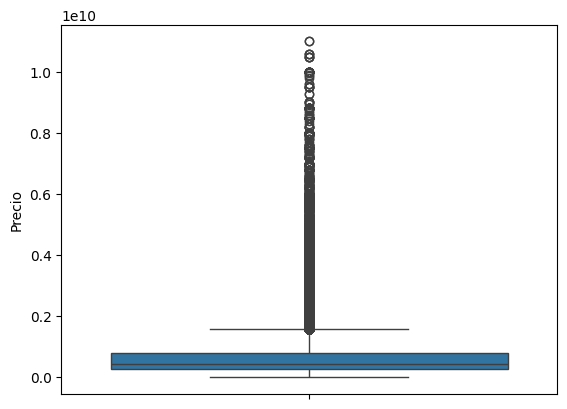

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df_modificado['Precio'])



In [25]:

# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df_modificado['Precio'].quantile(0.25)
Q3 = df_modificado['Precio'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores atípicos usando el rango intercuartílico
df_modificado = df_modificado[(df_modificado['Precio'] >= (Q1 - 1.5 * IQR)) & (df_modificado['Precio'] <= (Q3 + 1.5 * IQR))]

Text(0.5, 1.0, 'Boxplot de la columna Precio')

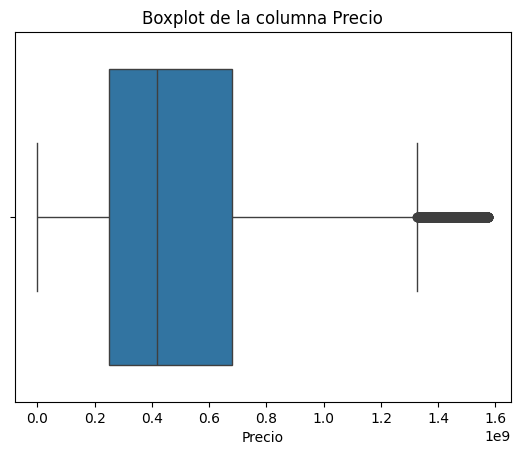

In [26]:
#Boxplot de columna Precio
sns.boxplot(x=df_modificado['Precio'])
plt.title("Boxplot de la columna Precio")

In [27]:
# Reducir aún más los valores atípicos de la columna Precio usando un rango más estricto (por ejemplo, 1.0*IQR)
Q1 = df_modificado['Precio'].quantile(0.25)
Q3 = df_modificado['Precio'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar usando 1.0*IQR en lugar de 1.5*IQR
df_modificado = df_modificado[(df_modificado['Precio'] >= (Q1 - 1.0 * IQR)) & (df_modificado['Precio'] <= (Q3 + 1.0 * IQR))]

Text(0.5, 1.0, 'Boxplot de la columna Precio')

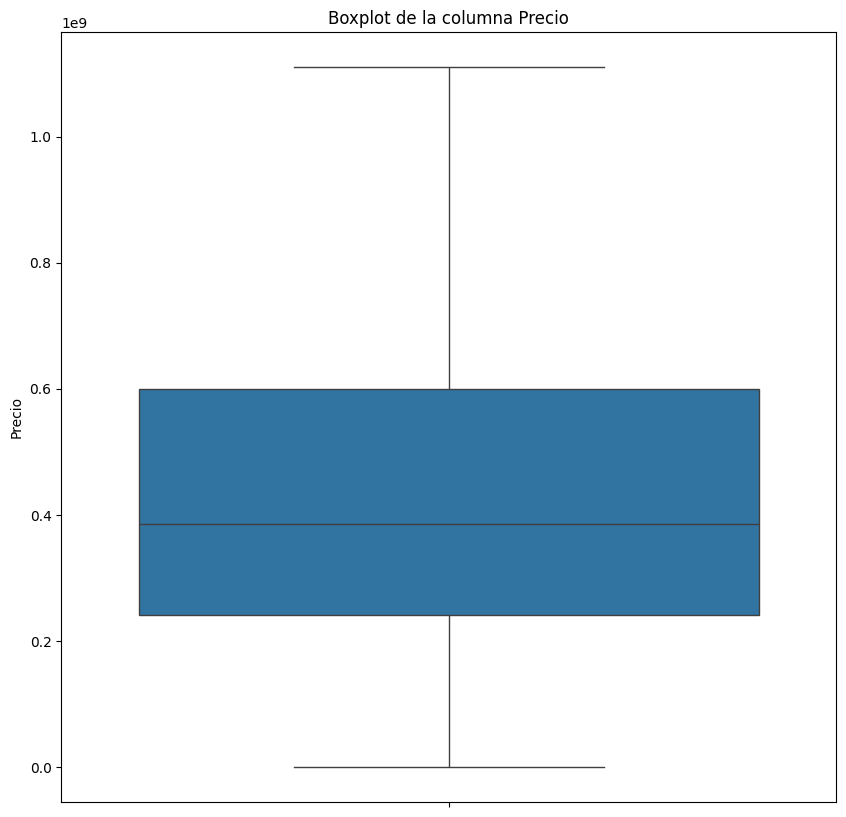

In [28]:
#Boxplot de columna Precio
plt.figure(figsize=(10,10))
sns.boxplot(df_modificado['Precio'])
plt.title("Boxplot de la columna Precio")



In [29]:
#Calculo de precio por metro cuadrado
df_modificado['Precio_por_M2'] = df_modificado['Precio']/df_modificado['Area Construida']

df_modificado['Precio_po_M2'] = df_modificado['Precio_por_M2'].astype('int')

In [30]:
df_modificado['Area Construida'] = df_modificado['Area Construida'].astype('int')

In [31]:
df_modificado

,Titulo,Fecha Actualizacion,ID Propiedad,Link Propiedad,Tipo Propiedad,Tipo Operacion,Link Google Maps,Direccion,Ubicacion Principal,Estado,Ciudad,Localidad,Comuna,Zona,Barrios,Piso N,Banos,Habitaciones,Garages,Area Construida,Antiguedad,Estrato,Precio,Antiguedad_Categoria,Localidad_Defi,Fecha_Captura,Año,Precio_por_M2,Precio_po_M2
0,Casa en venta,2024-11-08,10846760,https://www.fincaraiz.com.co/casa-en-venta/108...,Casa,Venta,"https://maps.google.com/?q=4.5866754,-74.1386996","Calle 52 Sur #36-42, Bogotá, Colombia",Fatima,Bogotá,Bogotá,Tunjuelito,No disponible,Zona sur,Fatima,-,4,9,1,250,16 a 30 años,3,390000000,4.0,Bogotá,2025-01-14,2024,1.560000e+06,1560000
1,Casa en venta,2024-12-09,10377449,https://www.fincaraiz.com.co/casa-en-venta/103...,Casa,Venta,"https://maps.google.com/?q=4.730176,-74.0253187","Cra. 7b #155-14, Bogotá, Colombia",Barrancas Norte,Bogotá,Bogotá,Usaquen,No disponible,Zona norte,Barrancas Norte - Rincon de calamar,-,4,8,1,243,más de 30 años,3,688000000,5.0,Bogotá,2025-01-14,2024,2.831276e+06,2831275
2,Casa en venta,2024-12-09,10179783,https://www.fincaraiz.com.co/casa-en-venta/101...,Casa,Venta,"https://maps.google.com/?q=4.6672435,-74.0825084","Carrera 57c #66b-29, Bogotá, Colombia",Popular modelo,Bogotá,Bogotá,Barrios unidos,No disponible,Zona occidental,Barrios Unidos - Popular modelo,-,3,5,1,218,más de 30 años,4,599000000,5.0,Bogotá,2025-01-14,2024,2.741419e+06,2741418
3,Casa en venta,2024-12-19,10688322,https://www.fincaraiz.com.co/casa-en-venta/106...,Casa,Venta,"https://maps.google.com/?q=4.6134471,-74.1568566","Carrera 75a Bis, Bogotá, Colombia",Lago Timiza,Bogotá,Bogotá,Kennedy,No disponible,Zona occidental,Lago Timiza - Timiza - Palenque,-,4,6,4,149,No disponible,3,570000000,0.0,Bogotá,2025-01-14,2024,3.825503e+06,3825503
4,Casa en Venta,2024-12-21,191808389,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.7208158,-74.1330795","Diagonal 77 #120a-68, Bogotá, Colombia",Gran granada,Bogotá,Bogotá,No disponible,No disponible,Zona Noroccidente,El dorado - Gran granada - Villas de alcala - ...,-,1,3,0,70,16 a 30 años,3,275000000,4.0,Bogotá,2025-01-14,2024,3.928571e+06,3928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142827,Casa en venta,2024-10-22,10005574,https://www.fincaraiz.com.co/casa-en-venta/100...,Casa,Venta,"https://maps.google.com/?q=4.2031308614113,-74...",Chimbi Melgar,Chimbi,Tolima,Melgar,No disponible,No disponible,No disponible,Chimbi,-,2,2,1,123,1 a 8 años,2,100000000,2.0,Melgar,2025-01-14,2024,8.130081e+05,813008
142828,"Casa en venta, Otros municipios",2022-10-26,7476331,https://www.fincaraiz.com.co/casa-en-venta-otr...,Casa,Venta,"https://maps.google.com/?q=4.09254741668701,-7...",carrera 9 # 2,Tomin,Tolima,San luis,No disponible,No disponible,No disponible,Tomin,-,2,3,2,144,9 a 15 años,3,250000000,3.0,No disponible,2025-01-14,2022,1.736111e+06,1736111
142830,Casa en Venta,2024-09-30,191503626,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.4355860647637,-75...",KR 4 # 68 - 31,Jordan et. i,Tolima,Ibagué,No disponible,Comuna 09,Picaleña y mirolindo,Jordan et. i - Jordan et. ii,-,3,6,0,210,No disponible,3,430000000,0.0,Ibagué,2025-01-14,2024,2.047619e+06,2047619
142831,"Casa Lote en venta, Otros municipios",2022-11-29,7778672,https://www.fincaraiz.com.co/casa-lote-en-vent...,Casa,Venta,"https://maps.google.com/?q=3.92863607406616,-7...",saldaña tolima,Saldaña,Tolima,Saldaña,No disponible,No disponible,No disponible,No disponible,-,1,3,0,450,1 a 8 años,1,36000000,2.0,No disponible,2025-01-14,2022,8.000000e+04,80000


In [32]:
print(f'El precio promedio es de: ${df_modificado['Precio'].mean().round()}')

El precio promedio es de: $444039395.0


In [33]:
#Precio promedio por ciudad

precio_ciudad = df_modificado.groupby('Ciudad')['Precio'].mean().round()
precio_ciudad.head(20).sort_values(ascending=False)




Ciudad
Abejorral               597666667.0
Alejandria - Bogotá     527777778.0
Anapoima                506982850.0
Anapoima - Bogotá       500000000.0
Alvarado                454000000.0
Alcala                  422142857.0
Acacías - Jamundí       400000000.0
Amagá                   369763912.0
Aguadas                 367142857.0
Acacías                 279333333.0
Alcala - Bogotá         275400000.0
Agua de dios            249378485.0
Andalucia - Bogotá      230000000.0
Andalucia               223333333.0
Andalucia - Medellín    170000000.0
Ambalema                170000000.0
Acacías - Palmira       165000000.0
Amagá - Itaguí          122155400.0
Amagá - Bogotá           87703000.0
Abrego                   65000000.0
Name: Precio, dtype: float64

In [34]:
#Precio promedio por Estado

precio_estado = df_modificado.groupby('Estado')['Precio'].mean().round()
precio_estado


Estado
Antioquia          519032404.0
Bogotá             482918353.0
Caldas             427334485.0
Cundinamarca       356735837.0
Magdalena          477826909.0
Meta               303501537.0
Risaralda          411365590.0
Santander          368614230.0
Tolima             315740615.0
Valle del Cauca    411884309.0
Name: Precio, dtype: float64

C:\Users\consu\AppData\Local\Temp\ipykernel_13376\2015092227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(precio_estado, orient='h', palette='viridis')


Text(0.5, 1.0, 'Precio promedio por Estado')

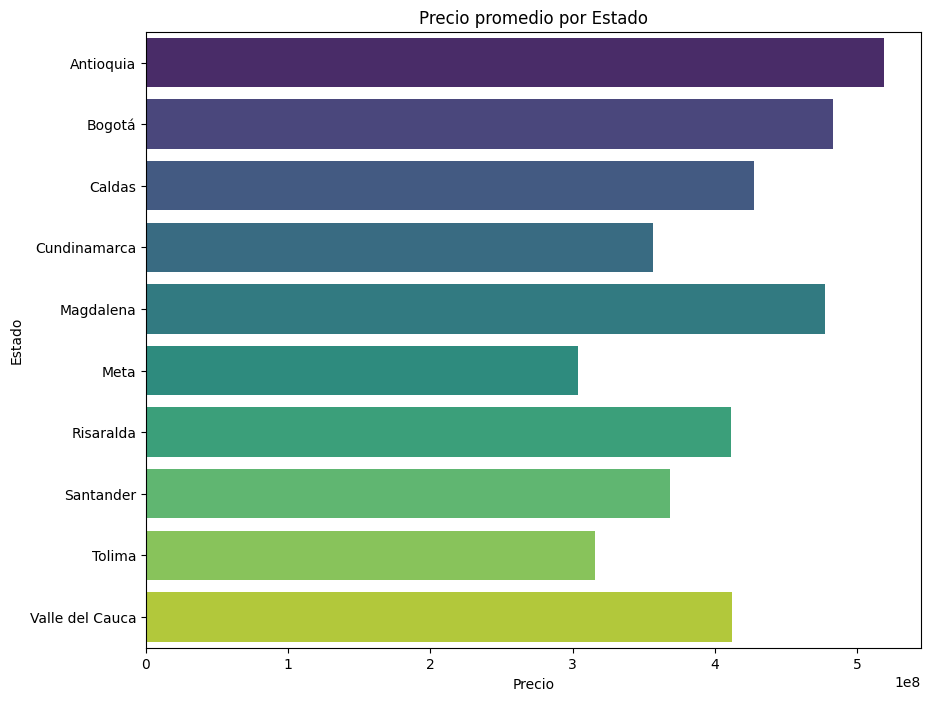

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(precio_estado, orient='h', palette='viridis')
plt.title('Precio promedio por Estado')


Text(0.5, 1.0, 'Distribucion de propiedades por Tipo de propiedad')

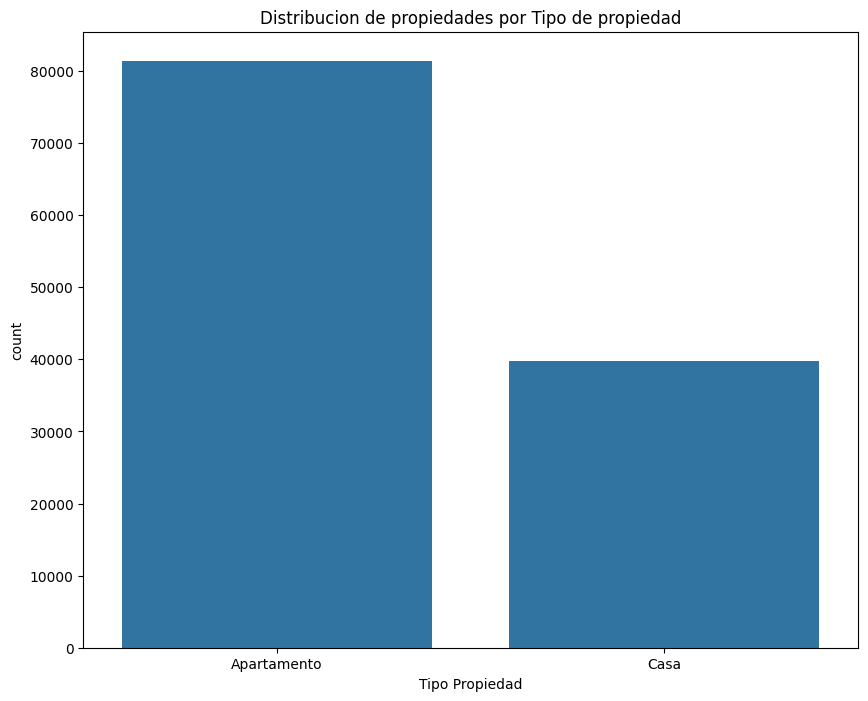

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(df_modificado['Tipo Propiedad'].value_counts())
plt.title("Distribucion de propiedades por Tipo de propiedad")


In [37]:
df_modificado['Tipo Propiedad'].value_counts()

Tipo Propiedad
Apartamento    81367
Casa           39752
Name: count, dtype: int64

In [38]:
df_modificado['Barrios'].value_counts().head(20)

Barrios
No disponible                                              2796
Chico norte                                                 473
Centro                                                      428
Laureles                                                    299
Lili - Valle del Lili - Senderos del Lili                   280
Chicó Reservado - Chico norte                               279
Centro - La florida                                         279
Santa barbara occidental - Calleja Baja - Santa Barbara     252
Santa barbara central - Multicentro - Santa Barbara         245
Cerritos                                                    232
Las Palmas                                                  224
Santa barbara occidental - Santa Barbara - Calleja Baja     197
Valle del Lili - Lili - Senderos del Lili                   195
Cabecera del llano                                          192
Estoril - Pasadena                                          184
El ingenio                      

In [39]:
df_modificado.describe()

,Fecha Actualizacion,ID Propiedad,Banos,Habitaciones,Garages,Area Construida,Estrato,Precio,Fecha_Captura,Año,Precio_por_M2,Precio_po_M2
count,121119,1.211190e+05,121119.000000,121119.000000,121119.000000,121119.00000,121119.000000,1.211190e+05,121119,121119.000000,1.211190e+05,1.211190e+05
mean,2024-09-17 10:17:14.176305920,1.180093e+08,2.416755,3.162889,1.009478,112.77764,3.883974,4.440394e+08,2025-01-14 00:00:00,2024.065242,4.468512e+06,4.468512e+06
min,2022-10-11 00:00:00,9.680460e+05,1.000000,1.000000,0.000000,5.00000,1.000000,1.265000e+05,2025-01-14 00:00:00,2022.000000,2.720000e+03,2.720000e+03
25%,2024-08-28 00:00:00,1.077852e+07,2.000000,3.000000,0.000000,62.00000,3.000000,2.420000e+08,2025-01-14 00:00:00,2024.000000,3.063063e+06,3.063063e+06
50%,2024-10-24 00:00:00,1.912785e+08,2.000000,3.000000,1.000000,86.00000,4.000000,3.850000e+08,2025-01-14 00:00:00,2024.000000,4.137931e+06,4.137931e+06
75%,2024-12-10 00:00:00,1.916009e+08,3.000000,3.000000,1.000000,135.00000,5.000000,6.000000e+08,2025-01-14 00:00:00,2024.000000,5.523256e+06,5.523255e+06
max,2025-01-14 00:00:00,1.918767e+08,8.000000,10.000000,5.000000,2100.00000,6.000000,1.110000e+09,2025-01-14 00:00:00,2025.000000,1.940000e+08,1.940000e+08
std,NaN,8.918623e+07,1.025623,1.309990,0.853564,87.63961,1.155879,2.449185e+08,NaN,0.498304,2.333887e+06,2.333887e+06


In [40]:
df_modificado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121119 entries, 0 to 142832
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Titulo                121119 non-null  object        
 1   Fecha Actualizacion   121119 non-null  datetime64[ns]
 2   ID Propiedad          121119 non-null  int64         
 3   Link Propiedad        121119 non-null  object        
 4   Tipo Propiedad        121119 non-null  category      
 5   Tipo Operacion        121119 non-null  object        
 6   Link Google Maps      121119 non-null  object        
 7   Direccion             121119 non-null  object        
 8   Ubicacion Principal   121119 non-null  object        
 9   Estado                121119 non-null  object        
 10  Ciudad                121119 non-null  object        
 11  Localidad             121119 non-null  object        
 12  Comuna                121119 non-null  object        
 13  Zona

C:\Users\consu\AppData\Local\Temp\ipykernel_13376\4142515977.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(df_modificado.groupby('Tipo Propiedad')['Precio'].mean().round())


<Axes: xlabel='Tipo Propiedad', ylabel='Precio'>

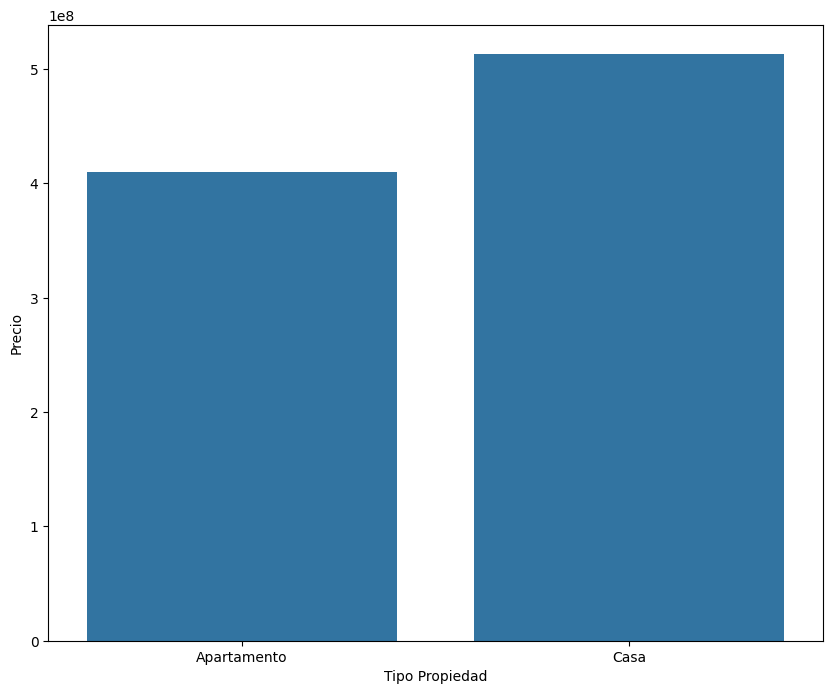

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(df_modificado.groupby('Tipo Propiedad')['Precio'].mean().round())

In [42]:
#Precio promedio por tipo de propiedad
df_modificado.groupby('Tipo Propiedad')['Precio'].mean().round()

C:\Users\consu\AppData\Local\Temp\ipykernel_13376\3721598944.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_modificado.groupby('Tipo Propiedad')['Precio'].mean().round()


Tipo Propiedad
Apartamento    410230507.0
Casa           513241644.0
Name: Precio, dtype: float64

In [43]:
#Precio por M2 por tipo de propiedad
df_modificado.groupby('Tipo Propiedad')['Precio_por_M2'].mean().round()

C:\Users\consu\AppData\Local\Temp\ipykernel_13376\3644969774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_modificado.groupby('Tipo Propiedad')['Precio_por_M2'].mean().round()


Tipo Propiedad
Apartamento    5004224.0
Casa           3371981.0
Name: Precio_por_M2, dtype: float64

In [44]:
#Precio M2 por ciudad

df_modificado.groupby('Ciudad')['Precio_por_M2'].mean().round().sort_values(ascending=False).head(20)

Ciudad
Calarcá - Ibagué                18750000.0
Bogotá - Zipaquirá              15900000.0
Puerto triunfo                  12321429.0
San martin - Bogotá             12094102.0
Zapatoca                         9983496.0
Quetame                          9880691.0
Mariquita - Bogotá               9812500.0
El rosario - Bogotá              9615385.0
El Retiro - Peñol                9027778.0
Belalcazar - Bogotá              8571429.0
Envigado - Sabaneta - Itaguí     8490079.0
Guatica                          8468057.0
Mosquera - Villa del rosario     8333333.0
Nueva granada - Bogotá           8081732.0
Juan de acosta - Puebloviejo     8016529.0
Juan de acosta - Sitionuevo      8009690.0
Floridablanca - Piedecuesta      7988797.0
San rafael                       7868710.0
El Retiro - Medellín             7670130.0
Villeta - Nimaima                7619048.0
Name: Precio_por_M2, dtype: float64

In [45]:
df_modificado[['Precio', 'Precio_por_M2']].describe()

,Precio,Precio_por_M2
count,1.211190e+05,1.211190e+05
mean,4.440394e+08,4.468512e+06
std,2.449185e+08,2.333887e+06
min,1.265000e+05,2.720000e+03
25%,2.420000e+08,3.063063e+06
50%,3.850000e+08,4.137931e+06
75%,6.000000e+08,5.523256e+06
max,1.110000e+09,1.940000e+08


_______________________________________________________
Correlacion de la columna Precio con otras columnas numericas

Text(0.5, 1.0, 'Correlacion de columnas numericas')

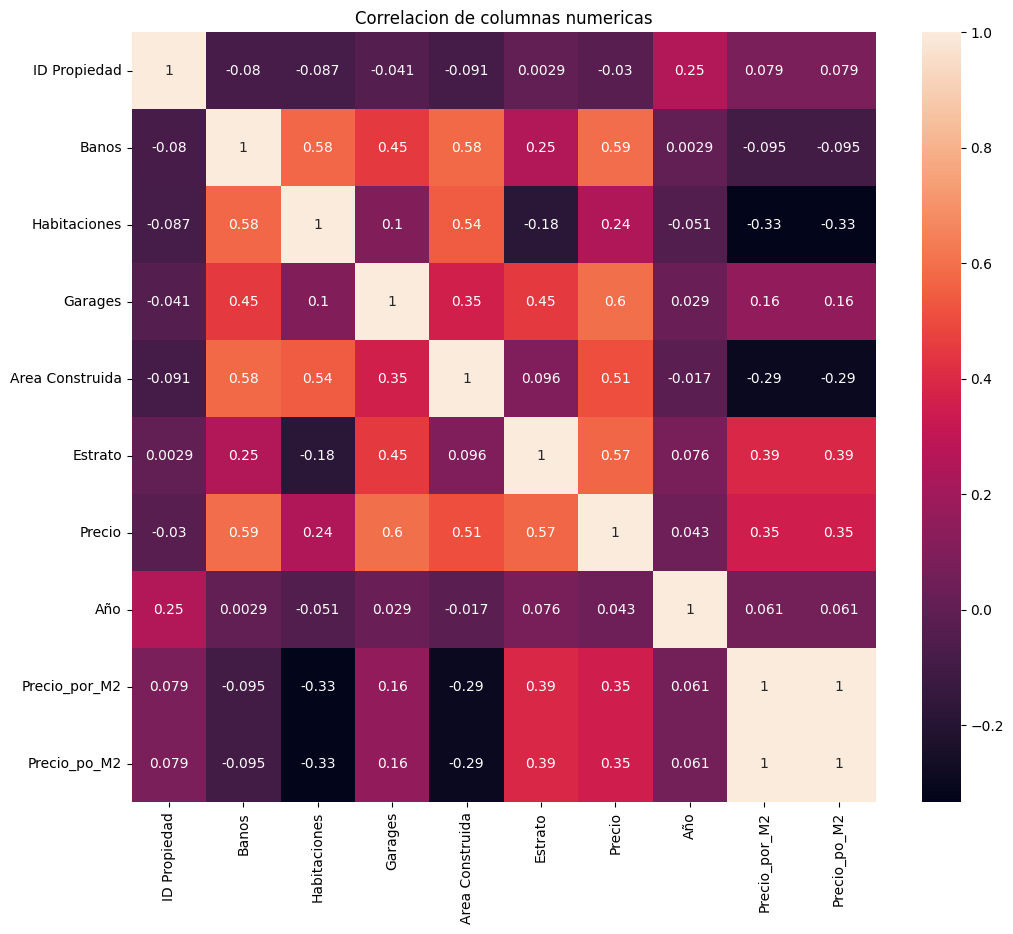

In [46]:
columnas_num = df_modificado.select_dtypes(['int', 'float']).corr()

plt.figure(figsize=(12,10))

sns.heatmap(columnas_num, annot=True)
plt.title('Correlacion de columnas numericas')



Se puede apreciar que la columna Precio tiene una correlacion fuerte con las columnas Baños, Garages, Area Construida y Estrato
_____________________________________________________________

C:\Users\consu\AppData\Local\Temp\ipykernel_13376\2398652894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(banos, palette='viridis')


Text(0.5, 0, 'Baños')

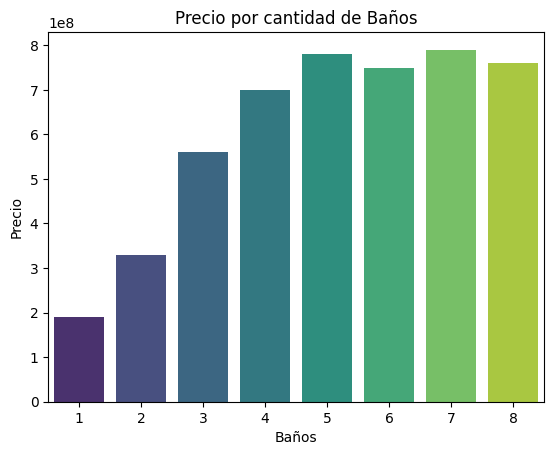

In [47]:
banos = df_modificado.groupby('Banos')['Precio'].median()

sns.barplot(banos, palette='viridis')
plt.title('Precio por cantidad de Baños')
plt.xlabel('Baños')


In [48]:
banos

Banos
1    190000000.0
2    330000000.0
3    560000000.0
4    700000000.0
5    779950000.0
6    750000000.0
7    790000000.0
8    760000000.0
Name: Precio, dtype: float64

C:\Users\consu\AppData\Local\Temp\ipykernel_13376\1829805651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(habitaciones, palette='viridis')


Text(0.5, 1.0, 'Precio por cantidad de habitaciones')

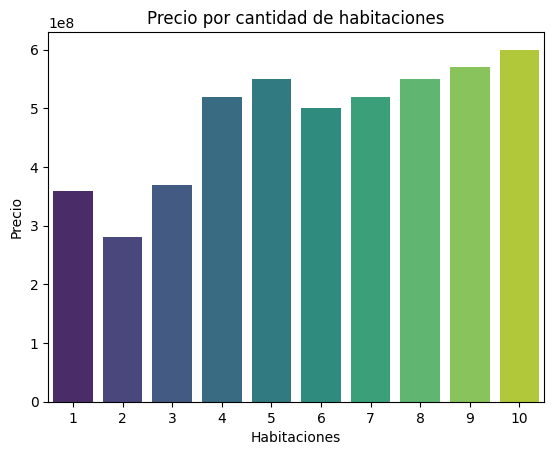

In [49]:
habitaciones = df_modificado.groupby('Habitaciones')['Precio'].median()

sns.barplot(habitaciones, palette='viridis')
plt.title('Precio por cantidad de habitaciones')

In [50]:
habitaciones

Habitaciones
1     360000000.0
2     280000000.0
3     370000000.0
4     520000000.0
5     550000000.0
6     500000000.0
7     520000000.0
8     550000000.0
9     570000000.0
10    600000000.0
Name: Precio, dtype: float64

__________________________________________________________________
Valores de Precio y Precio por metro cuadrado por capacidad de garage en las propiedades. Se saco la mediana de cada calor de precio y precio por metro cuadrado agrupado por Garage

In [51]:
garage_precio = df_modificado.groupby('Garages')['Precio'].median().round()
garagre_precio_m2 = df_modificado.groupby('Garages')['Precio_por_M2'].median().round()
print(f'Precio promedio por cantidad de garage: {garage_precio}')
print(f'Precio metro cuadrado promedio por cantidad de garages: {garagre_precio_m2}')

Precio promedio por cantidad de garage: Garages
0    225000000.0
1    375000000.0
2    680000000.0
3    800000000.0
4    850000000.0
5    830000000.0
Name: Precio, dtype: float64
Precio metro cuadrado promedio por cantidad de garages: Garages
0    3389831.0
1    4393939.0
2    5092593.0
3    3766239.0
4    3433333.0
5    2900000.0
Name: Precio_por_M2, dtype: float64


<Axes: xlabel='Año', ylabel='count'>

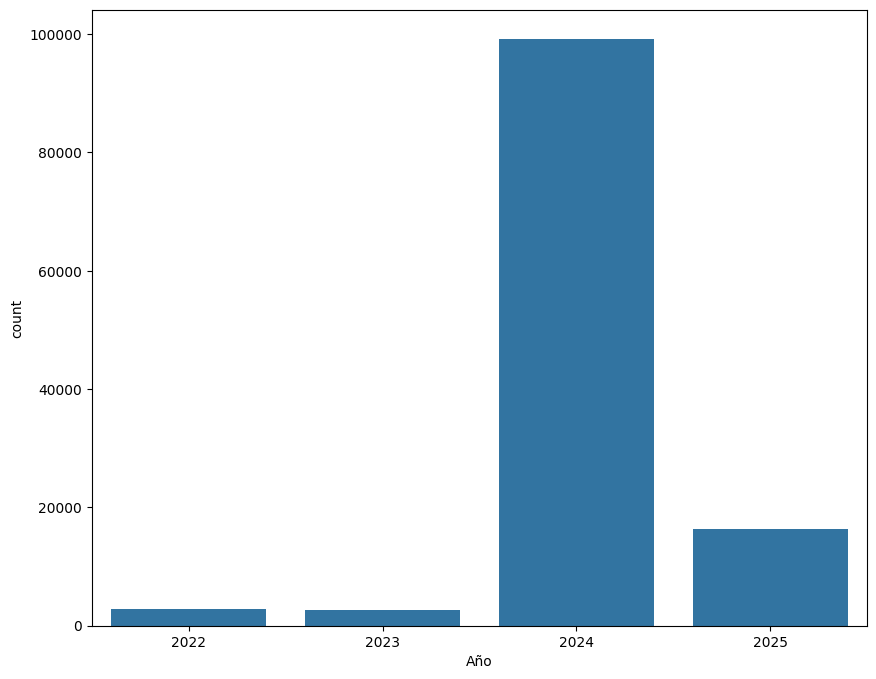

In [52]:
#Grafico de barras de cantidad de propiedades listadas por año

plt.figure(figsize=(10,8))
sns.barplot(df_modificado['Año'].value_counts())

<Axes: xlabel='Año', ylabel='Precio'>

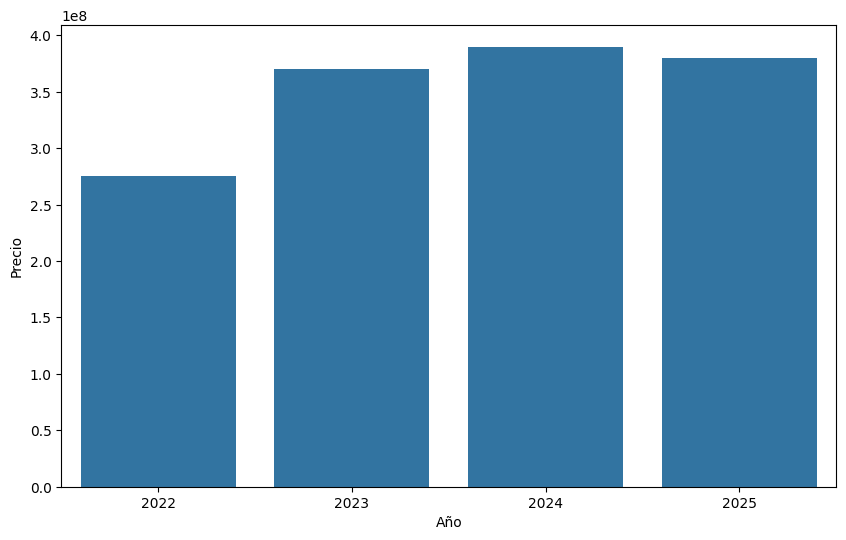

In [53]:
anio = df_modificado.groupby('Año')['Precio'].median()

plt.figure(figsize=(10,6))
sns.barplot(anio)

In [54]:
anio

Año
2022    275000000.0
2023    370000000.0
2024    390000000.0
2025    380000000.0
Name: Precio, dtype: float64

_____________________________________________
Carga de datos a archivo CSV para continuar con el analisis y la creacion del dashboard en Power BI

In [57]:
df_modificado.to_csv('FincaRaiz.csv')

In [56]:
df_modificado.head(20)

,Titulo,Fecha Actualizacion,ID Propiedad,Link Propiedad,Tipo Propiedad,Tipo Operacion,Link Google Maps,Direccion,Ubicacion Principal,Estado,Ciudad,Localidad,Comuna,Zona,Barrios,Piso N,Banos,Habitaciones,Garages,Area Construida,Antiguedad,Estrato,Precio,Antiguedad_Categoria,Localidad_Defi,Fecha_Captura,Año,Precio_por_M2,Precio_po_M2
0,Casa en venta,2024-11-08,10846760,https://www.fincaraiz.com.co/casa-en-venta/108...,Casa,Venta,"https://maps.google.com/?q=4.5866754,-74.1386996","Calle 52 Sur #36-42, Bogotá, Colombia",Fatima,Bogotá,Bogotá,Tunjuelito,No disponible,Zona sur,Fatima,-,4,9,1,250,16 a 30 años,3,390000000,4.0,Bogotá,2025-01-14,2024,1.560000e+06,1560000
1,Casa en venta,2024-12-09,10377449,https://www.fincaraiz.com.co/casa-en-venta/103...,Casa,Venta,"https://maps.google.com/?q=4.730176,-74.0253187","Cra. 7b #155-14, Bogotá, Colombia",Barrancas Norte,Bogotá,Bogotá,Usaquen,No disponible,Zona norte,Barrancas Norte - Rincon de calamar,-,4,8,1,243,más de 30 años,3,688000000,5.0,Bogotá,2025-01-14,2024,2.831276e+06,2831275
2,Casa en venta,2024-12-09,10179783,https://www.fincaraiz.com.co/casa-en-venta/101...,Casa,Venta,"https://maps.google.com/?q=4.6672435,-74.0825084","Carrera 57c #66b-29, Bogotá, Colombia",Popular modelo,Bogotá,Bogotá,Barrios unidos,No disponible,Zona occidental,Barrios Unidos - Popular modelo,-,3,5,1,218,más de 30 años,4,599000000,5.0,Bogotá,2025-01-14,2024,2.741419e+06,2741418
3,Casa en venta,2024-12-19,10688322,https://www.fincaraiz.com.co/casa-en-venta/106...,Casa,Venta,"https://maps.google.com/?q=4.6134471,-74.1568566","Carrera 75a Bis, Bogotá, Colombia",Lago Timiza,Bogotá,Bogotá,Kennedy,No disponible,Zona occidental,Lago Timiza - Timiza - Palenque,-,4,6,4,149,No disponible,3,570000000,0.0,Bogotá,2025-01-14,2024,3.825503e+06,3825503
4,Casa en Venta,2024-12-21,191808389,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.7208158,-74.1330795","Diagonal 77 #120a-68, Bogotá, Colombia",Gran granada,Bogotá,Bogotá,No disponible,No disponible,Zona Noroccidente,El dorado - Gran granada - Villas de alcala - ...,-,1,3,0,70,16 a 30 años,3,275000000,4.0,Bogotá,2025-01-14,2024,3.928571e+06,3928571
5,Casa en Venta,2024-12-30,191495613,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.7577937,-74.1026582","Conjunto Residencial Camino Verde Del Ciruelo,...",Suba Compartir,Bogotá,Bogotá,Suba,No disponible,Zona norte,Suba Compartir - Rincon de santa ines,-,2,3,0,69,16 a 30 años,3,190000000,4.0,Bogotá,2025-01-14,2024,2.739331e+06,2739331
6,Casa en venta,2024-07-15,10747389,https://www.fincaraiz.com.co/casa-en-venta/107...,Casa,Venta,"https://maps.google.com/?q=4.7215739,-74.1082833","Cl. 87 #103f 50, Engativá, Cundinamarca, Colombia",,Bogotá,Bogotá,No disponible,No disponible,Zona Noroccidente,Ub. bolivia oriental - Engativá - Bolivia orie...,-,2,3,1,71,más de 30 años,3,375000000,5.0,Bogotá,2025-01-14,2024,5.229396e+06,5229396
7,Casa en venta,2024-09-19,10763583,https://www.fincaraiz.com.co/casa-en-venta/107...,Casa,Venta,"https://maps.google.com/?q=4.7053024,-74.1079162","Cra. 93a #76-66, Bogotá, Colombia",Santa Rosita,Bogotá,Bogotá,No disponible,No disponible,Zona Noroccidente,Engativá - Santa Rosita - Primavera Engativa -...,-,3,8,2,260,No disponible,4,600000000,0.0,Bogotá,2025-01-14,2024,2.307692e+06,2307692
8,Casa en venta,2024-12-12,11073436,https://www.fincaraiz.com.co/casa-en-venta/110...,Casa,Venta,"https://maps.google.com/?q=4.5788780124765,-74...",Carrera 23 C #44 -53 SUR,Santa lucia,Bogotá,Bogotá,Rafael uribe,No disponible,Zona sur,Santa lucia,-,7,9,1,298,más de 30 años,3,600000000,5.0,Bogotá,2025-01-14,2024,2.013423e+06,2013422
9,Casa en Venta,2024-12-12,191725544,https://www.fincaraiz.com.co/casa-en-venta/191...,Casa,Venta,"https://maps.google.com/?q=4.6031016,-74.1796538","Carrera 78c #59 Sur-22, Bogotá, Colombia",Bosa,Bogotá,Bogotá,Bosa,No disponible,Zona occidental,Andalucia et. ii - Jose antonio galan - Andalu...,-,3,6,1,260,16 